Getting Started

Our dataset comes from the UCI Machine Learning repository link. The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns. We will make use of the article accompanying the dataset here for more information on the data and features.

Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the Materials and Methods section of the paper. How many marketing campaigns does this data represent?

The dataset collected is related to 17 campaigns that occurred between May 2008 and November 2010, 
corresponding to a total of 79354 contacts

Problem 2: Read in the Data

Use pandas to read in the dataset bank-additional-full.csv and assign to a meaningful variable name.

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#preprocessing
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score,recall_score,f1_score, ConfusionMatrixDisplay

#models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier

#plotting
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [3]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Problem 3: Understanding the Features

Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.

Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the Business Objective of the task. 
State the objective below.

The objective of this analysis is to predict whether a client will subscribe to a term deposit (y) based on their demographic, financial, campaign,contact, social and economic attributes.

By building a predictive model, the bank can focus its marketing efforts on clients who are most likely to respond positively. This will help improve the efficiency of telemarketing campaigns, save resources, and increase the overall success rate of term deposit subscriptions. The task also aims to identify the key factors that influence a client’s decision to subscribe.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
print(df.shape)

(41188, 21)


In [7]:
print(df.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [8]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
df.describe(include=['object'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


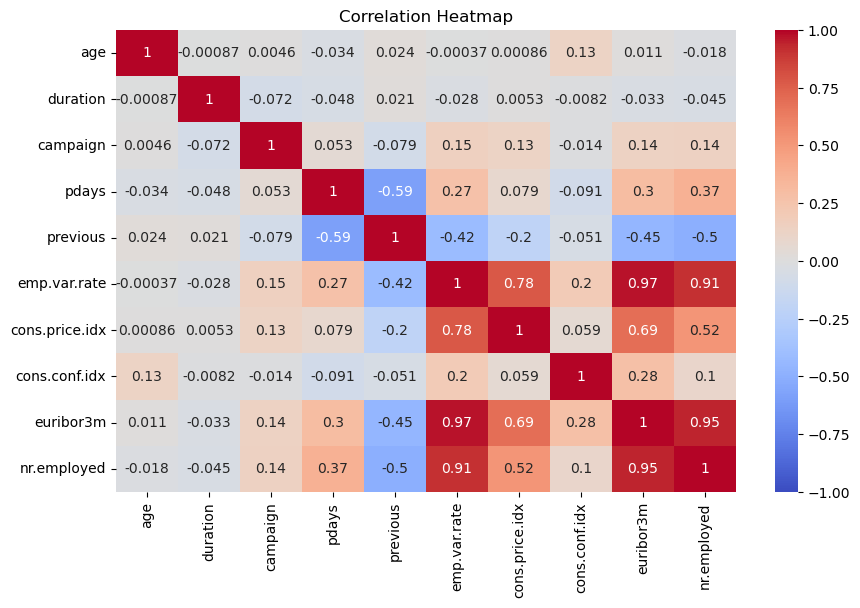

In [10]:
df_numeric=df.select_dtypes(include=['float64','int64'])
plt.figure(figsize=(10,6))
sns.heatmap(df_numeric.corr(),annot=True,cmap='coolwarm',vmin=-1,vmax=1)
plt.title('Correlation Heatmap')
plt.show()

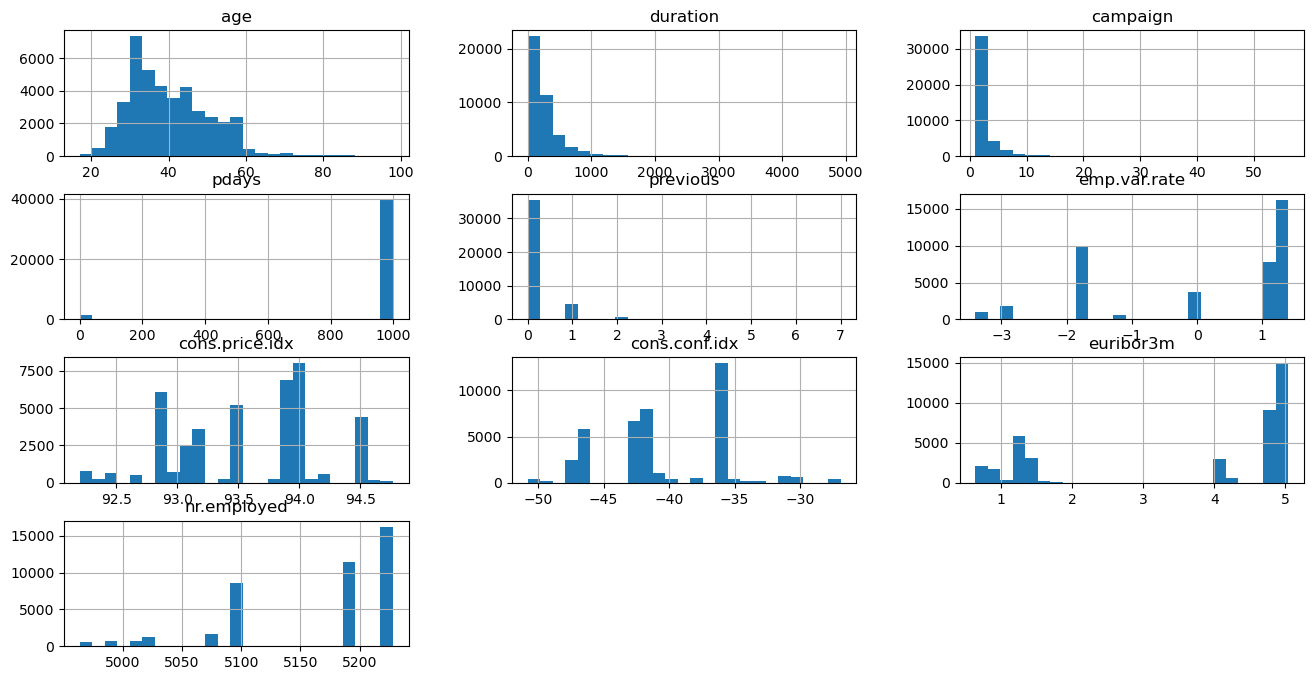

In [11]:
df_numeric.hist(bins=25, figsize=(16, 8))
plt.show()

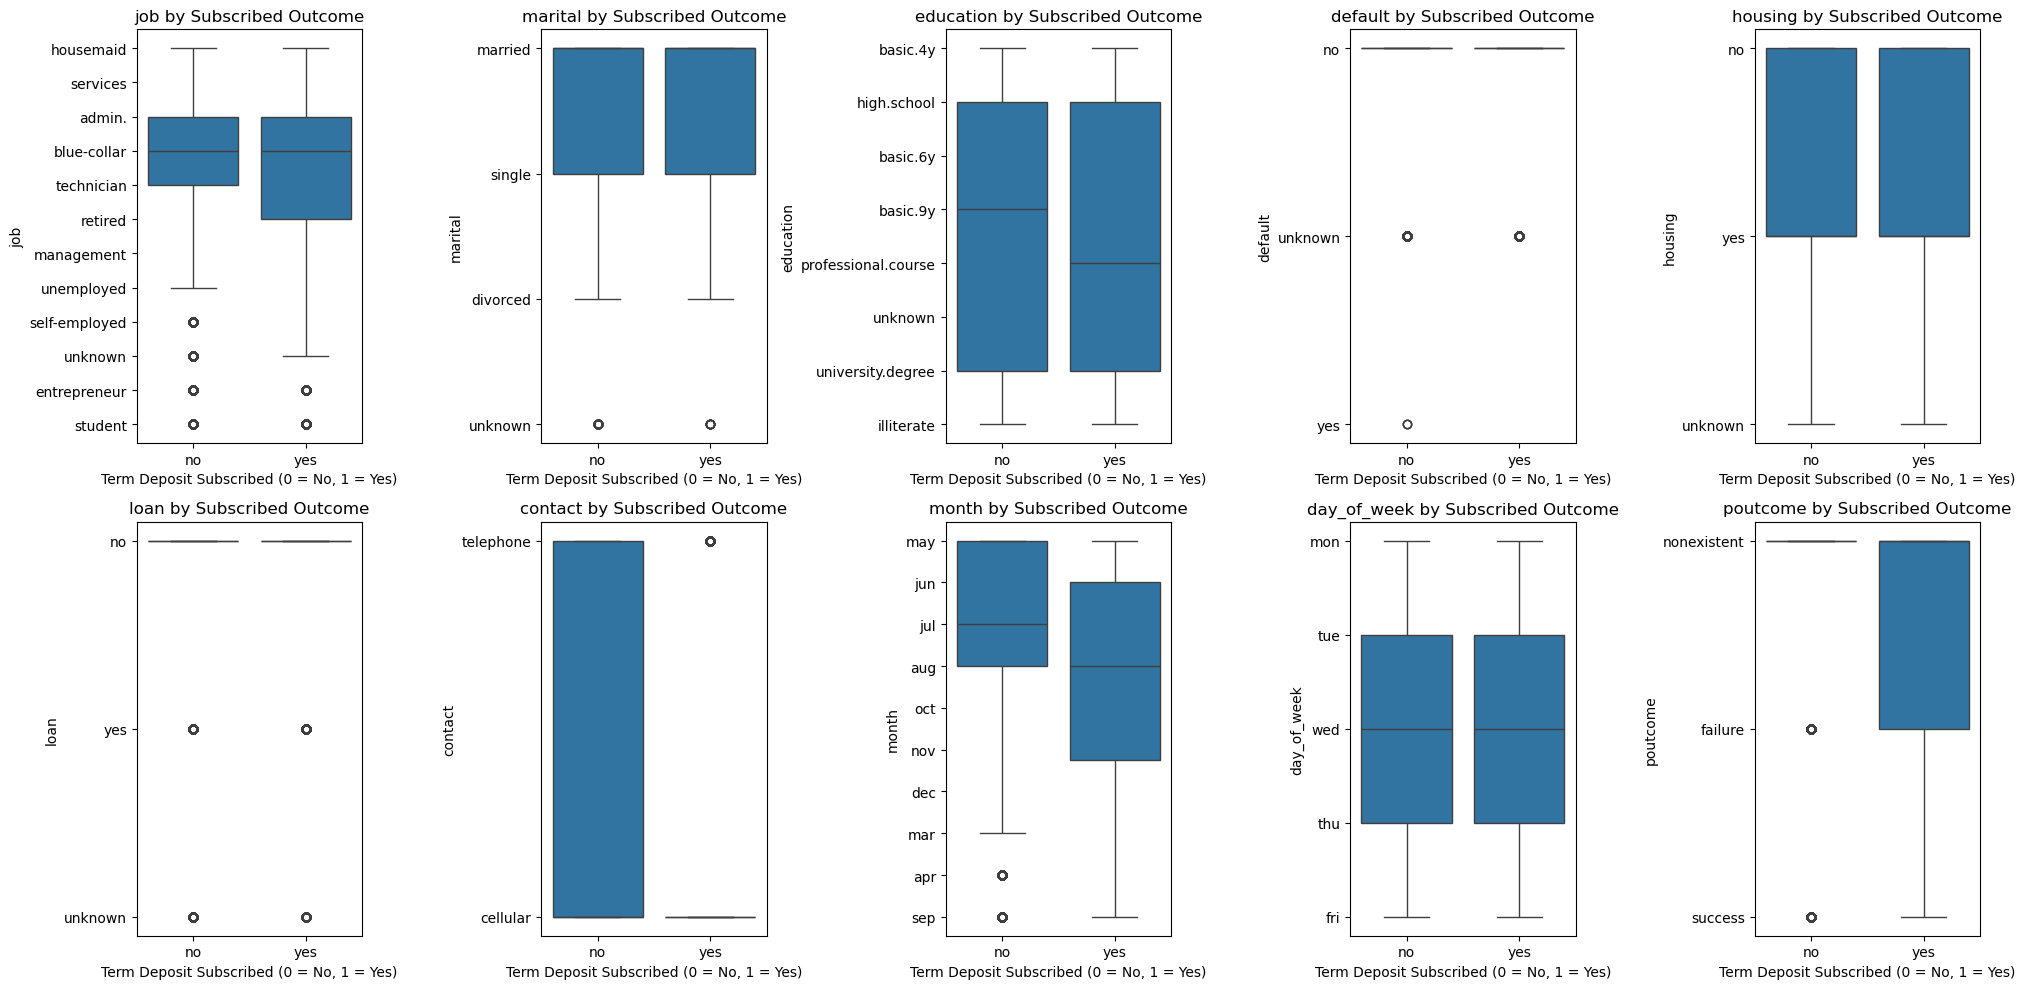

In [12]:
df_category=df.select_dtypes(include=['object'])
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()
for i, col in enumerate(df_category.columns[:-1]):
    sns.boxplot(data=df_category, x='y', y=col, ax=axes[i])
    axes[i].set_title(f"{col} by Subscribed Outcome")
    axes[i].set_xlabel("Term Deposit Subscribed (0 = No, 1 = Yes)")
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

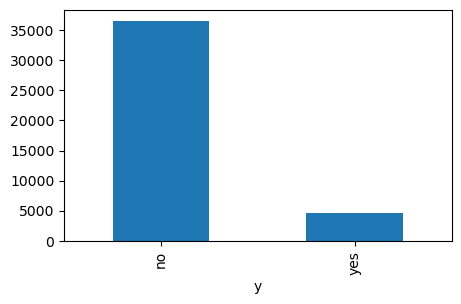

In [14]:
df['y'].value_counts().plot(kind='bar', figsize=(5, 3))
plt.show()

Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started. 
Before we can do this, we must work to encode the data. Using just the bank information features, 
prepare the features and target column for modeling with appropriate encoding and transformations.

In [15]:
NUMERICAL_FEATURES = ['age','duration','pdays','previous']
CATEGORICAL_FEATURES = ['job', 'marital', 'education', 'default', 'housing', 'loan','month','poutcome']    


In [16]:
#Creating a preprocessor
numeric_transformer = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, NUMERICAL_FEATURES),
        ('cat', categorical_transformer, CATEGORICAL_FEATURES)
    ]
)

Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [17]:
#split to train/test data
FEATURES = NUMERICAL_FEATURES + CATEGORICAL_FEATURES
X = df[FEATURES]
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
print(f"Training set size: {X_train.shape}. Training labels size: {y_train.shape}")
print(f"Test set size: {X_test.shape}. Test labels size: {y_test.shape}")

Training set size: (32950, 12). Training labels size: (32950,)
Test set size: (8238, 12). Test labels size: (8238,)


<Figure size 400x300 with 0 Axes>

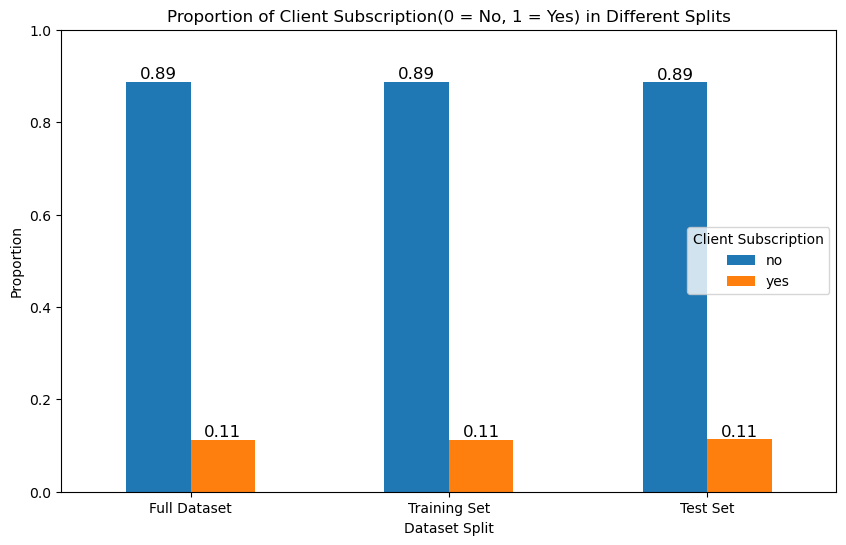

In [19]:
y_distribution_df = pd.DataFrame({
    'Full Dataset': df['y'].value_counts(normalize=True),
    'Training Set': y_train.value_counts(normalize=True),
    'Test Set': y_test.value_counts(normalize=True)
}).T
plt.figure(figsize=(4, 3))
ax = y_distribution_df.plot(kind='bar', figsize=(10, 6), rot=0)

plt.title("Proportion of Client Subscription(0 = No, 1 = Yes) in Different Splits")
plt.xlabel("Dataset Split")
plt.ylabel("Proportion")
plt.legend(title="Client Subscription")
plt.ylim(0, 1)

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", label_type="edge", fontsize=12)

plt.show()

In [20]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

numerical_column_names = NUMERICAL_FEATURES

# The method get_feature_names_out generates the names of the new columns created by OneHotEncoder for the categorical columns
categorical_column_names = preprocessor.named_transformers_['cat'].get_feature_names_out(CATEGORICAL_FEATURES)

# Combine the names of numerical and categorical columns into a single list
all_column_names = list(numerical_column_names) + list(categorical_column_names)

# Convert the matrix into a DataFrame with the column names
X_train_processed_df = pd.DataFrame(X_train_processed, columns=all_column_names)

X_train_processed_df.head()

,age,duration,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success
0,-0.001669,-0.631114,0.194661,-0.350902,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.864095,-0.546321,0.194661,-0.350902,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.819007,-0.943306,0.194661,1.677559,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.285806,-0.631114,0.194661,-0.350902,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.097494,0.332441,0.194661,-0.350902,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [21]:
 #Convert the matrix into a DataFrame with the column names
X_test_processed_df = pd.DataFrame(X_test_processed, columns=all_column_names)

X_test_processed_df.head()

,age,duration,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success
0,1.627357,0.436505,0.194661,1.677559,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.435707,0.105042,0.194661,-0.350902,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.672445,-0.792991,0.194661,1.677559,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.384970,0.374837,0.194661,-0.350902,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-1.247395,-0.264963,0.194661,-0.350902,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.
What is the baseline performance that our classifier should aim to beat?

In [22]:
#baseline prediction before balancing and resampling
random_baseline_before = DummyClassifier(strategy='stratified') # most_frequent for majority guess
random_baseline_before.fit(X_train_processed_df, y_train)
y_random_pred_bfr = random_baseline_before.predict(X_test_processed_df)

Baseline Accuracy: 0.80
Baseline Precision: 0.11
Baseline Recall: 0.11
Baseline F1 Score: 0.11


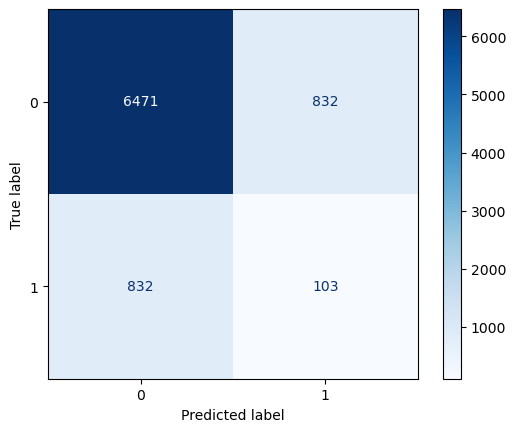

In [23]:
#baseline metrics calculation before resampling
accuracy_baseline_bfr = accuracy_score(y_test, y_random_pred_bfr)
precision_baseline_bfr = precision_score(y_test, y_random_pred_bfr,pos_label='yes', average='binary', zero_division=0)
recall_baseline_bfr = recall_score(y_test, y_random_pred_bfr,pos_label='yes', average='binary', zero_division=0)
f1_baseline_bfr = f1_score(y_test, y_random_pred_bfr,pos_label='yes', average='binary', zero_division=0)
cm_bfr = confusion_matrix(y_test, y_random_pred_bfr)

print(f"Baseline Accuracy: {accuracy_baseline_bfr:.2f}")
print(f"Baseline Precision: {precision_baseline_bfr:.2f}")
print(f"Baseline Recall: {recall_baseline_bfr:.2f}")
print(f"Baseline F1 Score: {f1_baseline_bfr:.2f}")

disp = ConfusionMatrixDisplay(confusion_matrix=cm_bfr, display_labels=[0, 1])
disp.plot(cmap='Blues', values_format='d')
plt.show()

Baseline accuracy is 80% prior to balancing the dataset, since 80% of dataset indicate target variable(y) value as 'no'

In [24]:
#Balancing dataset using resampling
from imblearn.over_sampling import SMOTE # pip install imbalanced-learn
from collections import Counter

# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto',random_state=42)

# Apply SMOTE to balance the dataset
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_processed_df, y_train)

In [25]:
print("class distribution after balancing:",Counter(y_train_balanced))

class distribution after balancing: Counter({'no': 29245, 'yes': 29245})


<Figure size 400x300 with 0 Axes>

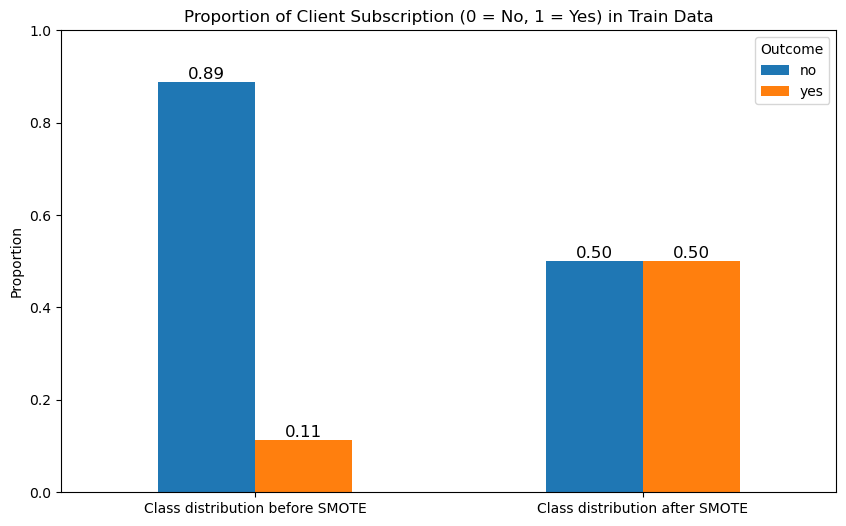

In [26]:
y_train_distribution_df = pd.DataFrame({
    'Class distribution before SMOTE': y_train.value_counts(normalize=True),
    'Class distribution after SMOTE': y_train_balanced.value_counts(normalize=True)
}).T

plt.figure(figsize=(4, 3))
ax = y_train_distribution_df.plot(kind='bar', figsize=(10, 6), rot=0)

plt.title("Proportion of Client Subscription (0 = No, 1 = Yes) in Train Data")
plt.ylabel("Proportion")
plt.legend(title="Outcome")
plt.ylim(0, 1)

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", label_type="edge", fontsize=12)

plt.show()

In [27]:
#A baseline model helps us understand whether our machine learning model is actually learning patterns or just memorizing class imbalances. A random baseline (Dummy with stratified) shows performance without any predictive power, 
#while a dummy majority-class baseline (Dummy with most_frequent) reveals whether the model is just favoring the dominant class. Comparing against these ensures that our model adds real value beyond guessing.

random_baseline = DummyClassifier(strategy='stratified') # most_frequent for majority guess
random_baseline.fit(X_train_balanced, y_train_balanced)
y_random_pred = random_baseline.predict(X_test_processed)

In [36]:
print(f"Training labels size: {y_train_balanced.shape}")
print(f"Test set size: {X_test.shape}. Test labels size: {y_test.shape}")

Training labels size: (58490,)
Test set size: (8238, 12). Test labels size: (8238,)


In [29]:
y_test.value_counts()

y
no     7303
yes     935
Name: count, dtype: int64

Baseline Accuracy: 0.50
Baseline Precision: 0.11
Baseline Recall: 0.47
Baseline F1 Score: 0.18


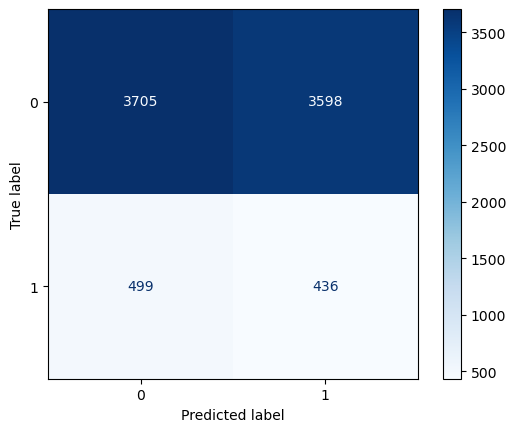

In [30]:
#baseline metrics calculation
accuracy_baseline = accuracy_score(y_test, y_random_pred)
precision_baseline = precision_score(y_test, y_random_pred,pos_label='yes', average='binary', zero_division=0)
recall_baseline = recall_score(y_test, y_random_pred,pos_label='yes', average='binary', zero_division=0)
f1_baseline = f1_score(y_test, y_random_pred,pos_label='yes', average='binary', zero_division=0)
cm = confusion_matrix(y_test, y_random_pred)

print(f"Baseline Accuracy: {accuracy_baseline:.2f}")
print(f"Baseline Precision: {precision_baseline:.2f}")
print(f"Baseline Recall: {recall_baseline:.2f}")
print(f"Baseline F1 Score: {f1_baseline:.2f}")

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues', values_format='d')
plt.show()

Baseline accuracy is 50% after balancing the dataset, model prediction should beat the baseline accuracy after balancing.

Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.

In [31]:
#Simple model train
lgr_model = LogisticRegression(max_iter=1000, random_state=42)
lgr_model.fit(X_train_processed_df,y_train)

LogisticRegression(max_iter=1000, random_state=42)

Problem 9: Score the Model

What is the accuracy of your model?

In [32]:
y_pred_lgr = lgr_model.predict(X_test_processed_df)

train_accuracy = lgr_model.score(X_train_processed_df,y_train)
test_accuracy = accuracy_score(y_test,y_pred_lgr)

print(f"Logistic Regression Training Accuracy: {train_accuracy:.2f}")
print(f"Logistic Regression Test Accuracy: {test_accuracy:.2f}")
print("\n Classification report:")
print(classification_report(y_test,y_pred_lgr))

Logistic Regression Training Accuracy: 0.91
Logistic Regression Test Accuracy: 0.91

 Classification report:
              precision    recall  f1-score   support

          no       0.92      0.98      0.95      7303
         yes       0.65      0.35      0.46       935

    accuracy                           0.91      8238
   macro avg       0.79      0.67      0.70      8238
weighted avg       0.89      0.91      0.89      8238



The LogisticRegression model predicts an accuracy of 91% indicating that the model classified 91% of instances in the test set. The classification report shows strong performance at predicting majority class ('no') and weak performance at predicting the minority class('yes')

Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models. Using the default settings for each of the models, fit and score each. Also, be sure to compare the fit time of each of the models. Present your findings in a DataFrame similar to that below:

Model	Train Time	Train Accuracy	Test Accuracy
.	.


In [37]:
# Create a list of models to train
models_train = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),  # You can adjust the number of neighbors
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
}

In [39]:
results_m = []
trained_models = {}

for model_name, model in models_train.items():
    print(f"Training and evaluating {model_name}")

 # Train the model on full training data and predict on the test set
    model.fit(X_train_balanced, y_train_balanced)
    y_train_pred = model.predict(X_train_balanced)
    y_test_pred = model.predict(X_test_processed_df)

    # Store trained model
    trained_models[model_name] = model

    # Compute train metrics
    train_accuracy = accuracy_score(y_train_balanced, y_train_pred)
    train_precision = precision_score(y_train_balanced, y_train_pred,pos_label='yes', average='binary', zero_division=0)
    train_recall = recall_score(y_train_balanced, y_train_pred,pos_label='yes', average='binary', zero_division=0)
    train_f1 = f1_score(y_train_balanced, y_train_pred,pos_label='yes', average='binary', zero_division=0)

    # Compute test metrics
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred,pos_label='yes', average='binary', zero_division=0)
    test_recall = recall_score(y_test, y_test_pred,pos_label='yes', average='binary', zero_division=0)
    test_f1 = f1_score(y_test, y_test_pred,pos_label='yes', average='binary', zero_division=0)

    # Store results
    results_m.append({
        "Model": model_name,
        "Train Accuracy": train_accuracy,
        "Train Precision": train_precision,
        "Train Recall": train_recall,
        "Train F1": train_f1,
        "Test Accuracy": test_accuracy,
        "Test Precision": test_precision,
        "Test Recall": test_recall,
        "Test F1": test_f1,
    })
   


Training and evaluating Logistic Regression
Training and evaluating SVM
Training and evaluating KNN
Training and evaluating Decision Tree
Training and evaluating Random Forest


In [40]:
results_df_m = pd.DataFrame(results_m).sort_values(by="Test F1",ascending=False)
print(results_df_m)

                 Model  Train Accuracy  Train Precision  Train Recall  \
1                  SVM        0.892238         0.864900      0.929697   
0  Logistic Regression        0.837870         0.849522      0.821200   
4        Random Forest        0.999966         0.999932      1.000000   
2                  KNN        0.936399         0.892874      0.991793   
3        Decision Tree        0.999966         1.000000      0.999932   

   Train F1  Test Accuracy  Test Precision  Test Recall   Test F1  
1  0.896129       0.843044        0.405789     0.824599  0.543915  
0  0.835121       0.846079        0.409756     0.808556  0.543885  
4  0.999966       0.886744        0.500980     0.546524  0.522762  
2  0.939738       0.830784        0.376280     0.746524  0.500358  
3  0.999966       0.862224        0.420000     0.561497  0.480549  


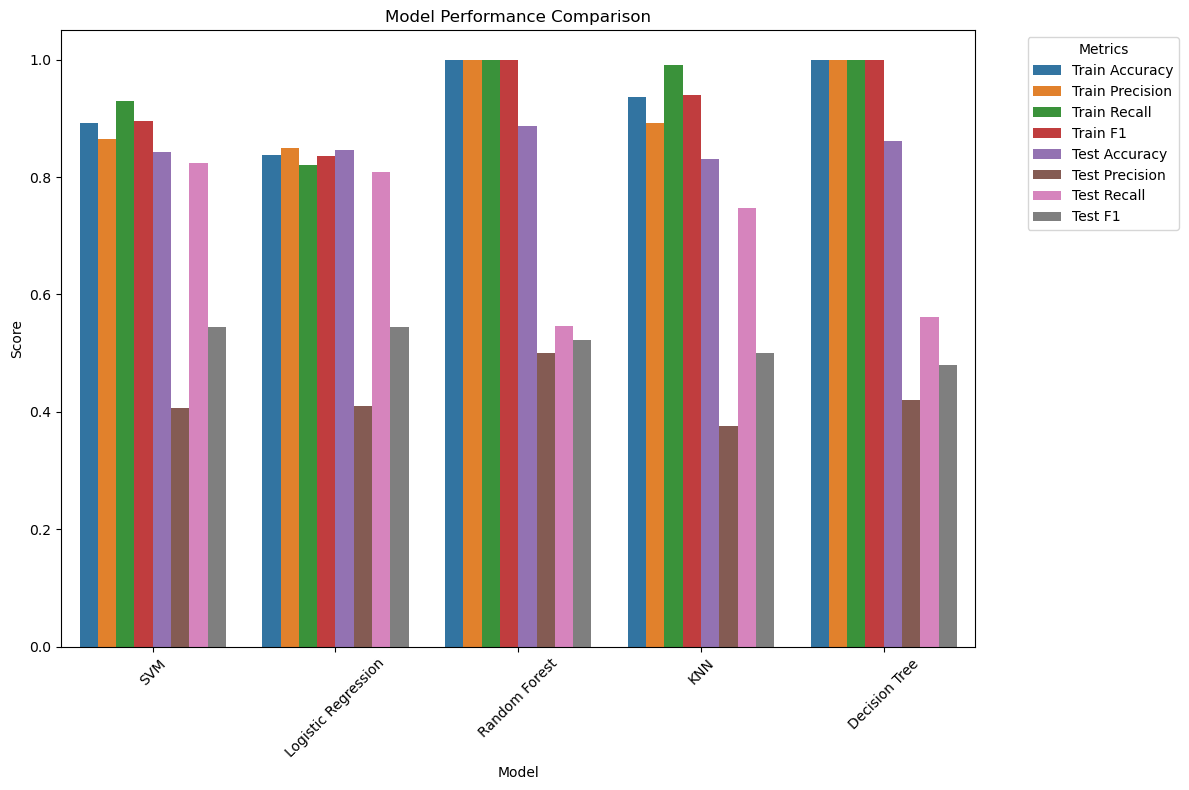

In [41]:
plt.figure(figsize=(12,8))
df_melted = results_df_m.melt(id_vars='Model', var_name='Metric', value_name='Score')
sns.barplot(x='Model',y='Score', hue='Metric',data=df_melted)
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

Key Observations on Model performance on balanced Train and Test data:
Training vs Test Performance:

Random Forest, Decision Tree, and KNN show very high training accuracy (close to 1.0), but their test accuracy is much lower. This suggests that these models may be overfitting the training data — they perform exceptionally well on the training set but generalize poorly to unseen data.

Random Forest and Decision Tree both have perfect training precision, recall, and F1, but these metrics drop significantly on the test data, showing that they are not generalizing well.

Logistic Regression and SVM show more consistent performance between training and test metrics. They have a moderate overfitting (less extreme than the other models), as their training and test scores are closer in value.

Precision, Recall, and F1-Score:
SVM performs well in terms of training precision and recall, but its test precision (0.409862) is quite low compared to train precision (0.865937). This suggests that although the model identifies many positive cases in training, it struggles with false positives when evaluated on the test set. The test F1-score (0.548033) shows a trade-off between precision and recall.

Logistic Regression has a reasonable balance between training and test performance, with moderate precision and recall values. Its test recall (0.810695) is fairly high, which means it performs better at detecting positive cases compared to precision (0.410395).

Random Forest and Decision Tree are highly overfitted:

Random Forest: Despite nearly perfect training metrics (1.0 for recall and precision), it has much lower test metrics (F1 = 0.527721), indicating it doesn't generalize well.

Decision Tree: Like Random Forest, it has perfect training scores but struggles to maintain those scores in the test set (F1 = 0.468401).

KNN also shows signs of overfitting, with high training recall (0.991759) and moderate accuracy and F1 on the test set. Its test F1-score is quite low (0.500358), suggesting it's missing many negative cases on the test set and thus performing poorly.

Conclusion and Recommendations:
For better generalization,Logistic Regression and SVM appear to be the most balanced models with moderate overfitting. These models have reasonable test performance and can be good choices for generalizing well to unseen data.

For better model interpretability,Logistic Regression is often favored because it is interpretable and easier to understand compared to models like SVM and Random Forest.

For higher accuracy, with overfitting,Random Forest and Decision Tree are highly accurate on the training data but fail to generalize well on the test data.

For high recall (i.e., detecting positive cases), SVM and Logistic Regression have good recall on the test data.

Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these. Below, we list a few things to explore in this pursuit.

More feature engineering and exploration. For example, should we keep the gender feature? Why or why not?
Hyperparameter tuning and grid search. All of our models have additional hyperparameters to tune and explore. For example the number of neighbors in KNN or the maximum depth of a Decision Tree.
Adjust your performance metric

In [42]:
#cross-validation evaluation
results_cv = {}

# Train each model with cross-validation
for model_name, model in models_train.items():
    print(f"Training and evaluating {model_name} with cross-validation...")

    # Perform cross-validation on the training set
    cv_scores = cross_val_score(
        model,
        X_train_balanced,
        y_train_balanced,
        scoring='accuracy',
        cv=5,  # 5-fold cross-validation
        n_jobs=-1  # Use all available processors for faster computation
    )

    # Train the model on the full training set
    model.fit(X_train_balanced, y_train_balanced)

    # Store the results in the dictionary
    results_cv[model_name] = {
        'Cross-Validation Accuracy (mean)': cv_scores.mean(),
        'Cross-Validation Accuracy (std)': cv_scores.std(),
    }

Training and evaluating Logistic Regression with cross-validation...
Training and evaluating SVM with cross-validation...
Training and evaluating KNN with cross-validation...
Training and evaluating Decision Tree with cross-validation...
Training and evaluating Random Forest with cross-validation...


In [43]:
results_df = pd.DataFrame(results_cv).T.sort_values('Cross-Validation Accuracy (mean)', ascending=False)
results_df

,Cross-Validation Accuracy (mean),Cross-Validation Accuracy (std)
Random Forest,0.938947,0.028651
KNN,0.907642,0.002100
Decision Tree,0.900752,0.032826
SVM,0.882937,0.005142
Logistic Regression,0.837647,0.002781


Random Forest has the highest mean cross-validation accuracy at 93.89% with a relatively low standard deviation (0.03), indicating it is both accurate and stable across different splits of the data.

In [44]:
#model evaluation on test dataset
results_ev = {}

for model_name, model in models_train.items():
    # Predict on the test set
    y_pred = model.predict(X_test_processed_df)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred,pos_label='yes')
    recall = recall_score(y_test, y_pred,pos_label='yes')
    f1 = f1_score(y_test, y_pred,pos_label='yes')
    confusion_mat = confusion_matrix(y_test, y_pred)

    # Store the results in the dictionary
    results_ev[model_name] = {
        'Accuracy': accuracy,
        'Precision':precision,
        'Recall': recall,
        'F1-Score': f1,
        'Confusion Matrix': confusion_mat
    }

In [45]:
results_df_ev = pd.DataFrame(results_ev).T.drop(columns='Confusion Matrix')
results_df_ev=results_df_ev.sort_values(['Accuracy'],ascending=False)
results_df_ev

,Accuracy,Precision,Recall,F1-Score
Random Forest,0.886744,0.50098,0.546524,0.522762
Decision Tree,0.862224,0.42,0.561497,0.480549
Logistic Regression,0.846079,0.409756,0.808556,0.543885
SVM,0.843044,0.405789,0.824599,0.543915
KNN,0.830784,0.37628,0.746524,0.500358


Random Forest has an accuracy of 88% and precision of 50% in comparison to Decision Tree, Logistic Regression, SVM and KNN. 
Logistic Regression and SVM have better recall and F1-Score than the other models.

In [52]:
#Model Improvement Define models and hyperparameters
models = {
    'knn': (KNeighborsClassifier(), {'knn__n_neighbors': [3, 5, 7]}),
    'logisticregression': (LogisticRegression(max_iter=1000), {'logisticregression__C': [0.1, 1, 10]}),
    'svc': (SVC(), {'svc__C': [0.1, 1, 10], 'svc__kernel': ['linear', 'rbf']}),
    'decisiontreeclassifier': (DecisionTreeClassifier(), {'decisiontreeclassifier__max_depth': [5, 10, 15]}),
   
}

In [54]:
results = []

for name, (model, params) in models.items():
    # Create a pipeline
    print(f"Tuning {name} with GridSearchCV...")
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        (name, model)
    ])
    
    # Perform grid search
    grid_search = GridSearchCV(pipeline, param_grid=params, cv=5, n_jobs=-1)
    
    # Fit the model and time it
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    fit_time = (time.time() - start_time) / len(grid_search.cv_results_['mean_fit_time'])
    
    # Get the best estimator
    best_model = grid_search.best_estimator_
    
    # Evaluate on training and test sets
    train_score = best_model.score(X_train, y_train)
    test_score = best_model.score(X_test, y_test)
    
    # Append the results
    results.append([name, train_score, test_score, fit_time])



Tuning knn with GridSearchCV...
Tuning logisticregression with GridSearchCV...
Tuning svc with GridSearchCV...
Tuning decisiontreeclassifier with GridSearchCV...


In [94]:
# Create the results DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'Train Score', 'Test Score', 'Average Fit Time'])
print(results_df)

                    Model  Train Score  Test Score  Average Fit Time
0                     knn     0.917693    0.901432          3.725911
1      logisticregression     0.905736    0.905195          0.777996
2                     svc     0.913475    0.906652        412.020753
3  decisiontreeclassifier     0.911411    0.908594          1.635252


In [127]:
model_params= {
    'knn': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]}),
    'logisticregression': (LogisticRegression(max_iter=1000), {'C': [0.1, 1, 10]}),   
    'decisiontreeclassifier': (DecisionTreeClassifier(), {'max_depth': [5, 10, 15]}),
    'Randomforest':(RandomForestClassifier(random_state=42),{'n_estimators': [50, 100, 200]}),
    'svm': (SVC(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
   
}

In [ ]:
results_b = []

for name, (model,params) in model_params.items():
    # Create a pipeline
    print(f"Tuning {name} with GridSearchCV...")
   
    
    # Perform grid search
    grid_search = GridSearchCV(model,param_grid=params,scoring='accuracy', cv=5, verbose=1)
    
    # Fit the model and time it
    start_time = time.time()
    grid_search.fit(X_train_balanced, y_train_balanced)
    fit_time = (time.time() - start_time) / len(grid_search.cv_results_['mean_fit_time'])
    
    # Get the best estimator
    best_model = grid_search.best_estimator_
    
    # Evaluate on training and test sets
    train_score = best_model.score(X_train_balanced, y_train_balanced)
    test_score = best_model.score(X_test_processed_df, y_test)
    
    # Append the results
    results_b.append([name, train_score, test_score, fit_time])

Tuning knn with GridSearchCV...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Tuning logisticregression with GridSearchCV...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Tuning decisiontreeclassifier with GridSearchCV...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Tuning Randomforest with GridSearchCV...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Tuning svm with GridSearchCV...
Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [93]:
# Create the results DataFrame
results_b_df = pd.DataFrame(results_b, columns=['Model', 'Train Score', 'Test Score', 'Average Fit Time'])
print(results_b_df)

                    Model  Train Score  Test Score  Average Fit Time
0                     knn     0.955428    0.842073         12.624346
1      logisticregression     0.837870    0.846079          2.423411
2                     svc     0.932775    0.872056        968.474739
3  decisiontreeclassifier     0.937579    0.860524          2.363605


In [125]:
results_b_df_new = pd.DataFrame(results_b, columns=['Model', 'Train Score', 'Test Score', 'Average Fit Time'])
df_results = pd.concat([results_b_df, results_b_df_new ], ignore_index=True)
print(df_results)

           Model  Train Score  Test Score  Average Fit Time
0  Random Forest     0.999966    0.887715         78.731205
1  Random Forest     0.999966    0.887715         78.731205


Random Forest classifier and KNN has the highest training accuracy but shows some drop-off in test performance, possibly indicating overfitting.

Random Forest and SVM has highest test accuracy but a longer fit time, making it less practical for large datasets.

Decision Tree has high accuracy and very fast training time, but may suffer from overfitting due to the difference in train and test accuracy.

Overall Logistic Regression is relatively fast with decent performance in both train and test sets and is more suited for faster, less complex problems.

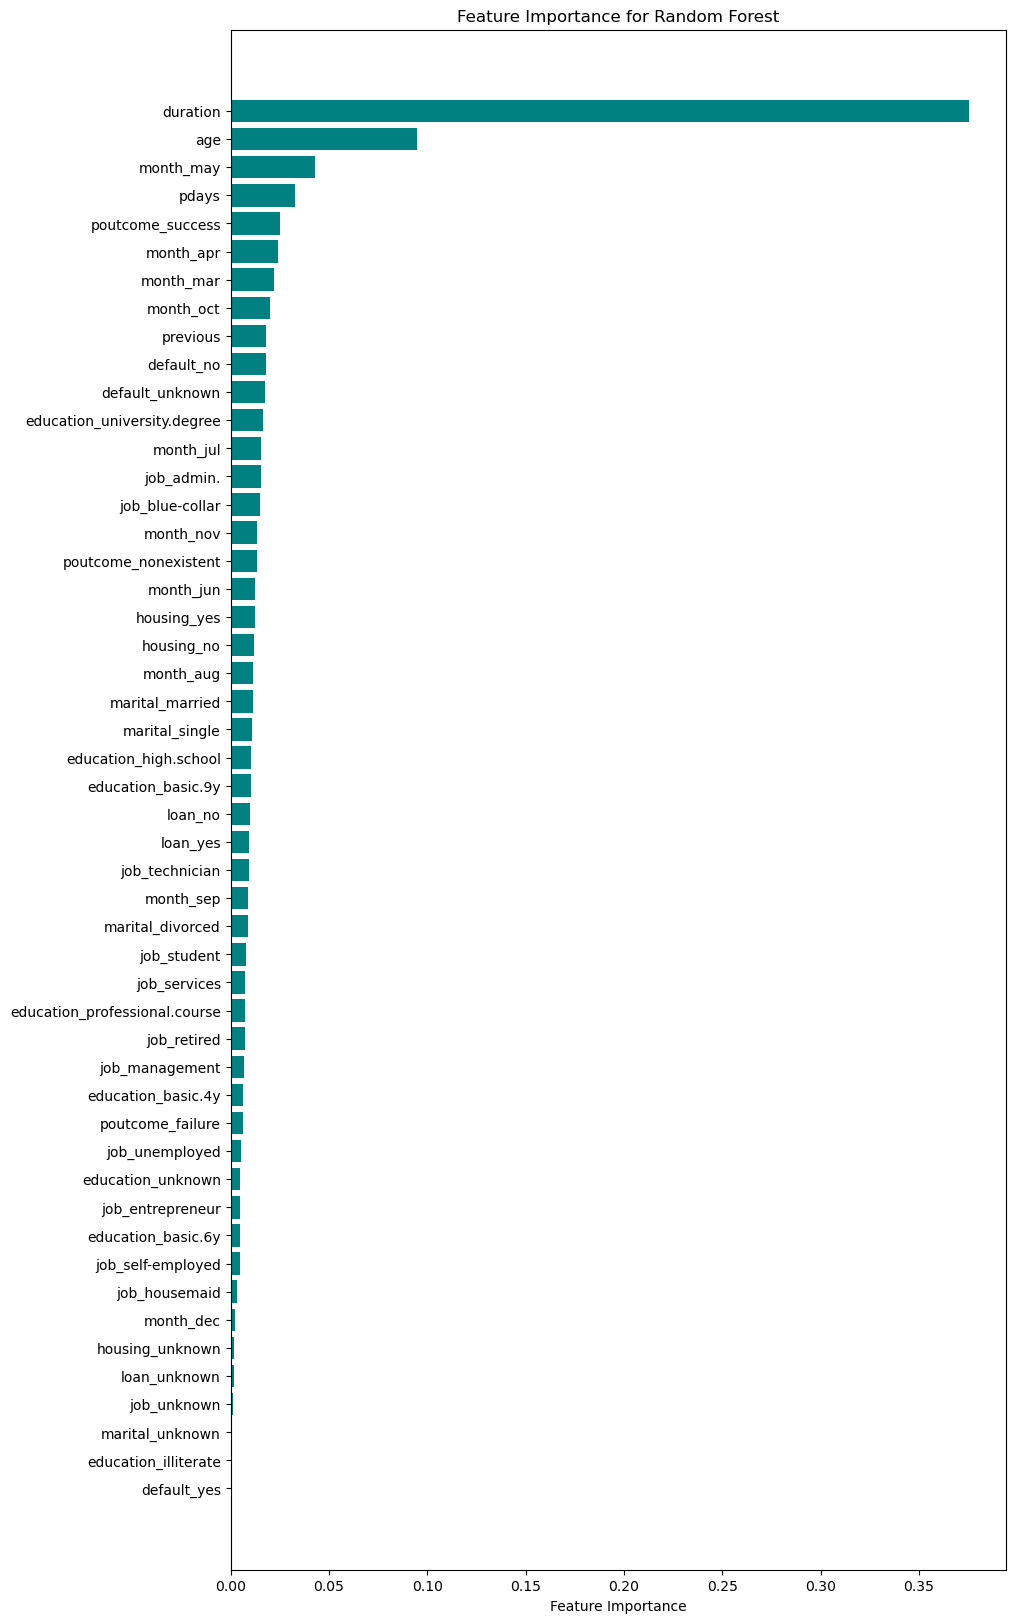

In [124]:
feature_importances = best_model.feature_importances_

# Create a DataFrame to visualize
feature_names = X_train_balanced.columns  # or the relevant feature names if you're using a different dataset
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 20))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='teal')
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Random Forest')
plt.gca().invert_yaxis()  # To show the most important features at the top
plt.show()


In [ ]:
coefficients = model.coef_[0]  # Get coefficients
feature_names = X_train_balanced.columns

# Create DataFrame for visualization
coeff_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort coefficients by absolute value
coeff_df['Abs Coefficient'] = np.abs(coeff_df['Coefficient'])
coeff_df = coeff_df.sort_values(by='Abs Coefficient', ascending=False)

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.barh(coeff_df['Feature'], coeff_df['Coefficient'], color='orange')
plt.xlabel('Coefficient Value')
plt.title('Feature Coefficients for Logistic Regression')
plt.gca().invert_yaxis()  # To show the most influential features at the top
plt.show()